<a href="https://colab.research.google.com/github/HwayoungYoon/Lecture-Seminar/blob/master/MNIST_MLP%2C_CNN_ipynb_190618_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [0]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

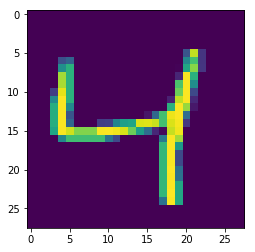

In [0]:
img = X_train[2]
plt.imshow(img)
plt.show()

In [0]:
y_train[2]

4

흑백 이미지 데이터는 픽셀 하나당 0-255까지의 숫자값을 가지므로 이를 255로 나누면 0-1 사이로 normalize됩니다.


In [0]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [0]:
batch_size = 128
num_classes = 10
epochs = 10

In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# 1. MLP
- 1 Hidden Layer
- 2 Make your Model

In [0]:

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

W0618 03:46:56.201705 140066602379136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0618 03:46:56.241683 140066602379136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0618 03:46:56.249023 140066602379136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

W0618 03:47:40.496245 140066602379136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0618 03:47:40.507888 140066602379136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0618 03:47:40.613215 140066602379136 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0618 03:47:40.676326 140066602379136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.2595 - acc: 0.9241 - val_loss: 0.1308 - val_acc: 0.9578
Epoch 2/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.1050 - acc: 0.9685 - val_loss: 0.1021 - val_acc: 0.9694
Epoch 3/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0696 - acc: 0.9794 - val_loss: 0.0934 - val_acc: 0.9710
Epoch 4/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0506 - acc: 0.9845 - val_loss: 0.0710 - val_acc: 0.9790
Epoch 5/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0373 - acc: 0.9885 - val_loss: 0.0721 - val_acc: 0.9786
Epoch 6/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0292 - acc: 0.9911 - val_loss: 0.0623 - val_acc: 0.9816
Epoch 7/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0221 - acc: 0.9935 - val_loss: 0.0648 - val_acc

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06853077512873788
Test accuracy: 0.9813


# 2. CNN

In [0]:
from keras import layers
from keras import models

In [0]:

model = Sequential()
model.add(layers.Conv2D(32, (3, 3),activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

W0616 23:59:27.712183 140194725619584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


Conv2D와 MaxPooling2D 층의 출력은 (height, width, channels) 크기의 3D 텐서입니다. 높이와 넓이 차원은 네트워크가 깊어질수록 작아지는 경향이 있습니다. 채널의 수는 Conv2D 층에 전달된 첫 번째 매개변수에 의해 조절됩니다(32개 또는 64개).

다음 단계에서 마지막 층의 ((3, 3, 64) 크기인) 출력 텐서를 완전 연결 네트워크에 주입합니다. 이 네트워크는 이미 익숙하게 보았던 Dense 층을 쌓은 분류기입니다. 이 분류기는 1D 벡터를 처리하는데 이전 층의 출력이 3D 텐서입니다. 그래서 먼저 3D 출력을 1D 텐서로 펼쳐야 합니다. 그다음 몇 개의 Dense 층을 추가합니

In [0]:

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                36928     
__________

10개의 클래스를 분류하기 위해 마지막 층의 출력 크기를 10으로 하고 소프트맥스 활성화 함수를 사용합니다. 

이제 전체 네트워크는 다음과 같습니다:

여기에서 볼 수 있듯이 (3, 3, 64) 출력이 (576,) 크기의 벡터로 펼쳐진 후 Dense 층으로 주입되었습니다.

이제 MNIST 숫자 이미지에 이 컨브넷을 훈련합니다.

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 57s 954us/step - loss: 3.2439 - acc: 0.7953
Epoch 2/5
60000/60000 [==============================] - 57s 944us/step - loss: 2.5637 - acc: 0.8375
Epoch 3/5
60000/60000 [==============================] - 57s 943us/step - loss: 2.0881 - acc: 0.8667
Epoch 4/5
60000/60000 [==============================] - 57s 943us/step - loss: 1.5123 - acc: 0.9022
Epoch 5/5
60000/60000 [==============================] - 57s 949us/step - loss: 1.1612 - acc: 0.9243


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 3s 345us/step


0.9442